In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("test_sample.csv")
data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491
0,-58.948879,-1.710589,0.283541,0.469626,0.639467,-1.030055,2.697716,0.627697,3.011719,0.029324,...,-1.843867,1.247797,-4.045276,-2.014322,-3.397130,-0.508852,-0.968719,2.364272,-1.423751,-1.471408
1,-81.771433,0.786305,0.487393,-1.318558,-2.679510,3.537192,-3.302606,2.706675,3.821938,1.130009,...,2.801061,-4.458686,0.234551,-0.095964,-2.607052,-0.351867,1.129410,3.133045,0.857933,1.574130
2,-5.150351,-0.237796,0.464159,1.109148,-2.983156,1.085993,-1.900479,-1.364876,2.908320,-0.854718,...,1.063574,-0.409950,0.749580,-0.008359,1.370357,-1.231248,2.016464,-1.457812,1.485063,0.771769
3,-97.430968,-0.860481,0.904318,-0.628736,-1.633116,-3.113388,-2.178529,2.974476,1.616400,-4.139817,...,-2.808208,-1.086781,6.143918,-1.612804,-2.077196,-3.205908,0.339454,3.009775,-1.756167,2.720281
4,127.068567,0.190194,0.086481,-2.100652,2.030412,-1.059621,-0.245092,0.160303,0.893935,0.116297,...,-1.944232,4.527971,-0.602099,-1.443668,1.653318,-0.376846,-1.589530,-2.782705,0.930838,1.961442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,116.201950,2.738787,-0.735110,0.298720,2.755009,-0.503918,-0.177335,0.834425,-1.667074,-0.120366,...,1.860394,-0.462544,0.390242,1.671288,0.856004,-0.605502,4.034006,2.839728,-0.020572,1.230242
496,26.747553,0.193538,-3.392222,2.907017,3.020668,2.979945,1.834314,-0.931165,-3.175605,-2.345071,...,-0.739655,-0.147612,-0.630172,-1.811403,-4.101706,0.189166,-0.948402,-0.811596,-0.284488,-2.781183
497,-180.261076,0.278711,-0.029837,1.535201,-0.190928,-0.017675,2.147191,4.044643,-3.367218,-1.238703,...,2.028675,-3.519571,-0.804931,-1.384919,-1.901983,-1.054744,1.042418,-0.481606,2.357227,0.940923
498,70.383398,-1.672302,-0.345761,1.915130,-1.093746,1.738662,-0.065307,0.429219,-0.754178,-0.769757,...,0.626853,-2.155428,1.224440,1.630954,-3.614330,-1.728719,-3.610236,1.500115,3.151266,-0.591147


In [ ]:
#обучаем общую модель потом смотим что получается без вхождения i-го и выбираем тот влияние которого наименьшее и выкидываем
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

def rel_imp_mes(X, y):
  names = X.columns
  lm0 = sm.OLS(y, sm.add_constant(X)).fit()
  res = pd.DataFrame(columns=["last", "first", "betasq", "pratt"], index=names)
  for c in names:
    lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
    res.loc[c, "last"] = lm0.rsquared - lm.rsquared
  corr = [np.corrcoef(y, X[i])[0, 1] for i in names]
  res["first"] = np.square(corr)
  sx = X.apply(np.std, axis=0)
  res["betasq"] = np.square((sx * lm0.params[names])/np.std(y))
  res["pratt"] = (sx * lm0.params[names])/np.std(y)*corr
  return res

y = data["Y"]
X = data.drop("Y", axis=1)
res = rel_imp_mes(X, y)

In [ ]:
res

In [5]:
print(res.sum(axis=0))
print("-"*50)
lm0 = sm.OLS(y, sm.add_constant(X)).fit()
print(lm0.rsquared)


last      0.014596
first     1.988661
betasq    0.960284
pratt     0.999997
dtype: object
--------------------------------------------------
0.9999972733400386


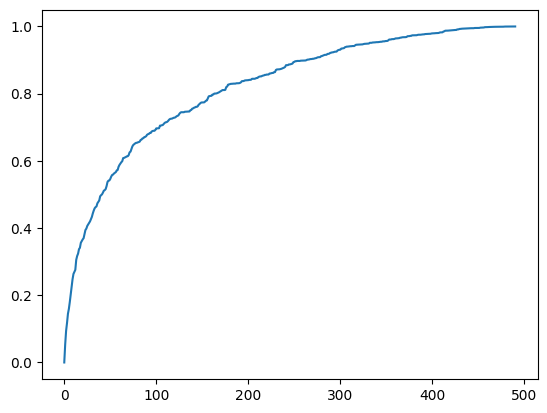

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def rSqared(X, y):
  return sm.OLS(y, sm.add_constant(X)).fit().rsquared

res_sorted = res.sort_values(by="first", ascending=False)
sorted_names = res_sorted.index
det_coef = np.array([rSqared(X[sorted_names[:i]], y) for i in range(0, len(res))])
num_of_pred = np.arange(0,len(res))
plt.plot(num_of_pred, det_coef)

In [7]:
n_orig1 = 0
while(det_coef[n_orig1] <= 0.9):
  n_orig1 += 1
n_orig1 += 1
print(n_orig1)

265


In [ ]:
#Regsubset
def Regsubset(X, y):
  rss=np.array([])#список имен
  names = X.columns #изначальный список который мы отсортируем
  for i in range(len(names)):
    new_elem = names.drop(rss)[0]
    max = rSqared(X[np.append(rss, new_elem)], y)
    for j in names.drop(rss):
      max2 = rSqared(X[np.append(rss, j)], y)
      if max2 > max:
        new_elem = j
        max = max2
    rss = np.append(rss, new_elem)
  return rss

rss = Regsubset(X, y)

In [ ]:
rss

NameError: name 'rss' is not defined

In [8]:
det_coef = [rSqared(X[rss[:i]], y) for i in range(len(rss))]
x = np.arange(0, 20)
plt.plot(x, det_coef)

NameError: name 'rss' is not defined